In [1]:
from OFDM import *
%matplotlib inline
plt.rcParams["figure.figsize"] = [12.0,8.0]

In [2]:
bits = load_file("We shall fight them on the beaches.txt")

In [3]:
tx = transmitter(mode = 2, no_pilots=20, packet_length=180)

In [4]:
# Load known bits - use for bitwise or with odd files
known_bits = np.array([], dtype=np.uint8)
with open("handouts/random_bits.txt", mode='rb') as f:
    for i in range(tx.data_bits_per_symbol):
        known_bits = np.append(known_bits, int(f.read(1)))
known_bits = np.tile(known_bits, int(np.ceil(len(bits)/len(known_bits))))
known_bits = known_bits[:len(bits)]
bits_tx = np.bitwise_xor(bits, known_bits)

In [5]:
signal = tx.transmit(bits_tx, graph_output=False)

------------------------------------------
TRANSMIT
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      2047 
Cyclic prefix length:               704 
Modulation method:                  QPSK 
Sync Method:                        chirp 
Packet Length:                      180
Number of bits to transmit:         176784
Number of OFDM symbols to transmit: 180
Number of packets to transmit:      1


In [6]:
#r = play_record(signal, tx.fs)
sd.play(signal, tx.fs)

In [6]:
fs, r = wavfile.read("test.wav")
r = r /1.01
#print(fs)
#r = signal

/Users/Adam/anaconda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [7]:
rx = receiver(mode = 2, no_pilots=20, packet_length=180)

In [11]:
#tx_symbols = tx.map(tx.SP(tx.pad(bits)))
#zeros = rx.chirp_method(r)
#data_symbols, sp, ep = rx.get_data(np.fft.fft(rx.remove_cp(rx.get_symbols(r,zeros))))
#rx_symbols, hs, he, h = rx.equalise(data_symbols, sp, ep)
#rx_symbols = rx_symbols[:,rx.data_carriers-1]

#for i in range(2):
#    plt.plot(np.unwrap(np.angle(rx_symbols[i])))
#    plt.plot(np.unwrap(np.angle(tx_symbols[i])), color="blue")

------------------------------------------
Receive 
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      2047 
Cyclic prefix length:               704 
Modulation method:                  QPSK 
Sync Method:                        chirp 
Packet Length:                      180
Number of received OFDM symbols:    180
Number of received bits:            504000


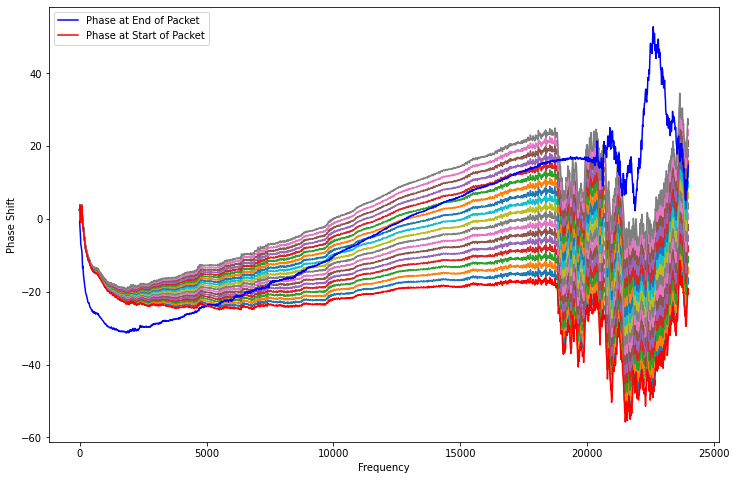

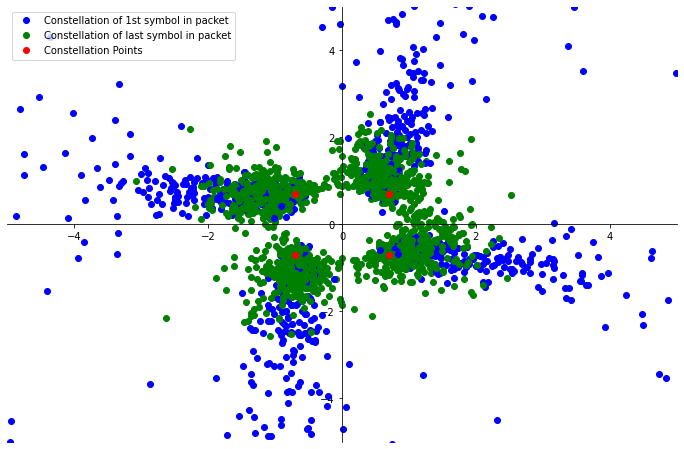

In [8]:
rx_bits, Hstart, Hend = rx.receive(r, graph_output=True)

In [9]:
rx_bits = np.bitwise_xor(rx_bits[:len(bits)], known_bits)

errs = np.sum(abs(bits-rx_bits[:len(bits)]))
print("BER: {}".format(errs/len(bits)))
name, file = save_file(rx_bits)

BER: 0.20256358041451716
File Name: We shall fight them on the beaches.txt
File Size: 22053 bytes


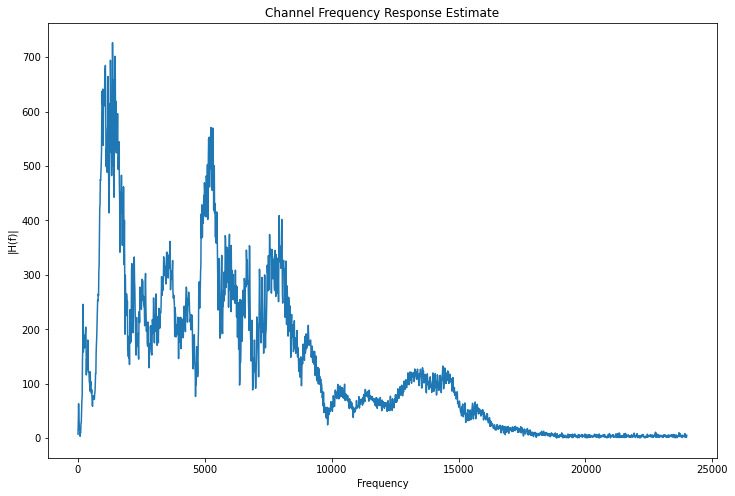

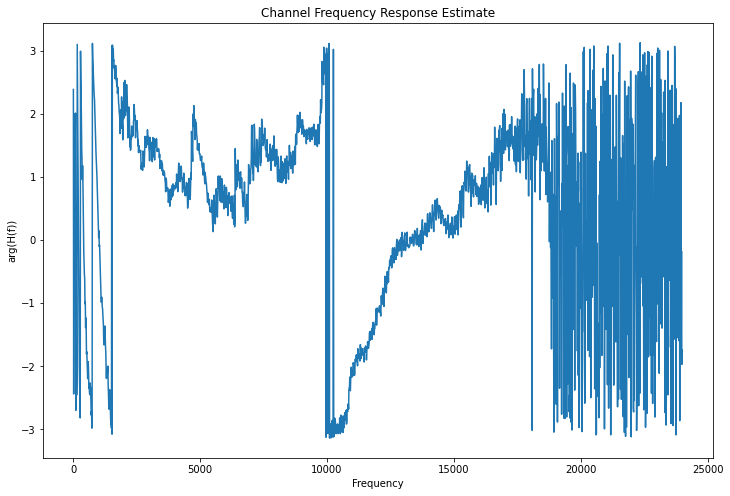

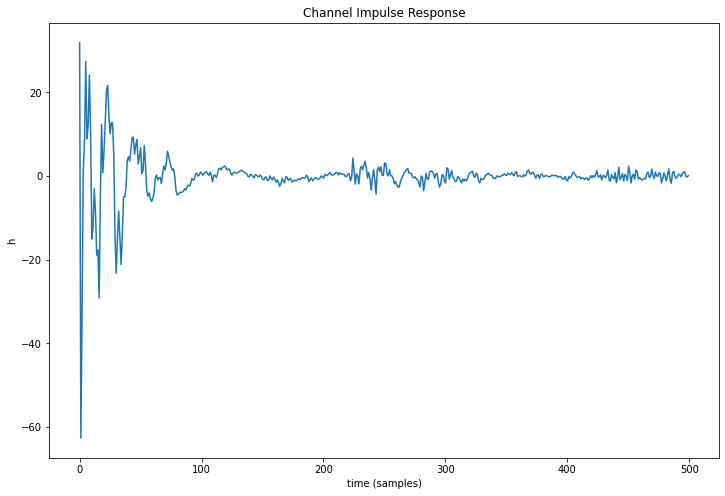

In [10]:
rx.channel_response(Hstart)